In [69]:
library(tidyverse)
library(repr)
library(infer)
library(cowplot)
library(broom)
library(dplyr)
library(knitr)
library(GGally)
options(repr.matrix.max.rows = 6)
options(repr.plot.width = 15, repr.plot.height =7) 

In [70]:
## the dataset can be read from the URL link:
## the dataset is already in tidy format, removed index
data_sci_job_salaries <- read_csv("https://raw.githubusercontent.com/SimonYYL/STAT-301/main/ds_salaries.csv") %>%
  rename(index = 1)  %>% select(-index)
head(data_sci_job_salaries, 5)

New names:
• `` -> `...1`
Rows: 607 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): experience_level, employment_type, job_title, salary_currency, empl...
dbl (5): ...1, work_year, salary, salary_in_usd, remote_ratio

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## **Clean and wrangle** <br> 
## Evaluating the dataset's structure against tidy data principles:
- Variables are neatly organized into individual columns.
- Observations are systematically arranged in rows.
- The dataset is structured around a single observational unit, captured in a consolidated table. <br>
**This indicates that the dataset is essentially in a tidy format.**

## Visualization

## Barplots
**Note**: due to the potentially large number of unique job titles, employee residence, and company location. We'll focus on those that are most common in the dataset to maintain clarity in the visualization. 
### Explanation:
Visualized and compared the distribution of the continuous variable across the different categories. This comparison can help in understanding the relationship between the categorical variable and the continuous outcome (our target "salary_in_usd"). <br>
Here's **why** I choose boxplots to explore the data: <br>
- **Central Tendency**: The line in the middle of the box represents the median of the distribution, which gives a good sense of the central tendency of the salary within each category. By comparing the medians across categories, we can see which categories tend to have higher or lower salaries.

- **Variability**: The boxplot shows the interquartile range (IQR). A larger IQR indicates more variability in salary within that category. This can help identify categories with a wide range of salaries versus those with more consistent salaries.

- **Skewness**: The position of the median within the boxplot can give us info about the skewness of the salary distribution within each category. 

- **Outliers**: Points plotted beyond the the boxplot represent outliers. Outliers can indicate special cases, such as exceptionally high or low salaries that might be due to unique circumstances.

- **Comparisons**: By placing boxplots for each category side by side, we can easily compare these aspects across categories. This visual comparison can reveal patterns, such as certain job roles, company size, or experience level that might have consistently higher salaries, more variability, or more outliers.

### Exploring and Result:
After reviewing each boxplot, here is what I found: <br>
- For **work_year**: 
    - It appears that there is a general upward trend in salaries over the years included in the dataset.
    - This variable is a **potential problem** we need to deal with, there are several reasons why it may not be a strong predictor in a model:
        -  it's a proxy for underlying factors that evolve over time, such as inflation, technological advancements, and shifts in the job market demand for data science skills.
        - Models that heavily rely on the year as a predictor can become quickly outdated as new data emerges.
- For **experience_level**:
    - The distribution shows a clear trend where salaries increase with higher experience levels. This suggests that experience level is a significant factor in determining salary, with senior positions ('SE') and Director ('EX') earning higher salaries compared to mid-level ('MI') and junior positions ('EN' Entry-level).
    - This variable stands out as a **strong predictor** for our model due to its significant relationship with the target variable.
- For **employment_type**:
    - There are variations in salary across different employment types, The distribution indicates that contract roles generally offer higher salaries compared to part-time and full-time. This is realistically true.
    - The spread out shows different variations do not overlap too much compare with each other which suggests employment type could be a **strong predictor** for our model.
- For **company_size**:
    - The spread out does not show a significant difference between Large size of company vs mid size of company based on the salary in usd, which indicates company size is not a good predictor.
- For **remote_ratio**:
    - The distribution reveals minimal discernible difference between fully remote (100%) and non-remote (0%) roles, with substantial overlap in their interquartile ranges (IQR). This overlap suggests that the remote ratio may not be an effective predictor.
- For **job_title**:
    - There is a significant variation in salaries across different job titles, highlighting the importance of the specific role and responsibilities associated with each title.
    - This variable stands out as a **strong predictor** for our model due to its significant relationship with the target variable.
- For **company_location** and **employee_residence**:
    - The salaries show variation across different countries of residence, indicating geographical location's impact on data science salaries.
    - Similar to employee residence, the company's location also impacts salaries, reflecting regional economic factors and the global distribution of tech hubs.
    - These two variables stands out as **strong predictors** for our model due to their significant relationship with the target variable.

In [71]:
data <- data_sci_job_salaries %>% select(-salary, -salary_currency)
target <- "salary_in_usd"
variables_to_convert <- c("work_year", "experience_level","employment_type","job_title", "employee_residence","remote_ratio","company_location", "company_size")
variables <-setdiff(names(data),target)

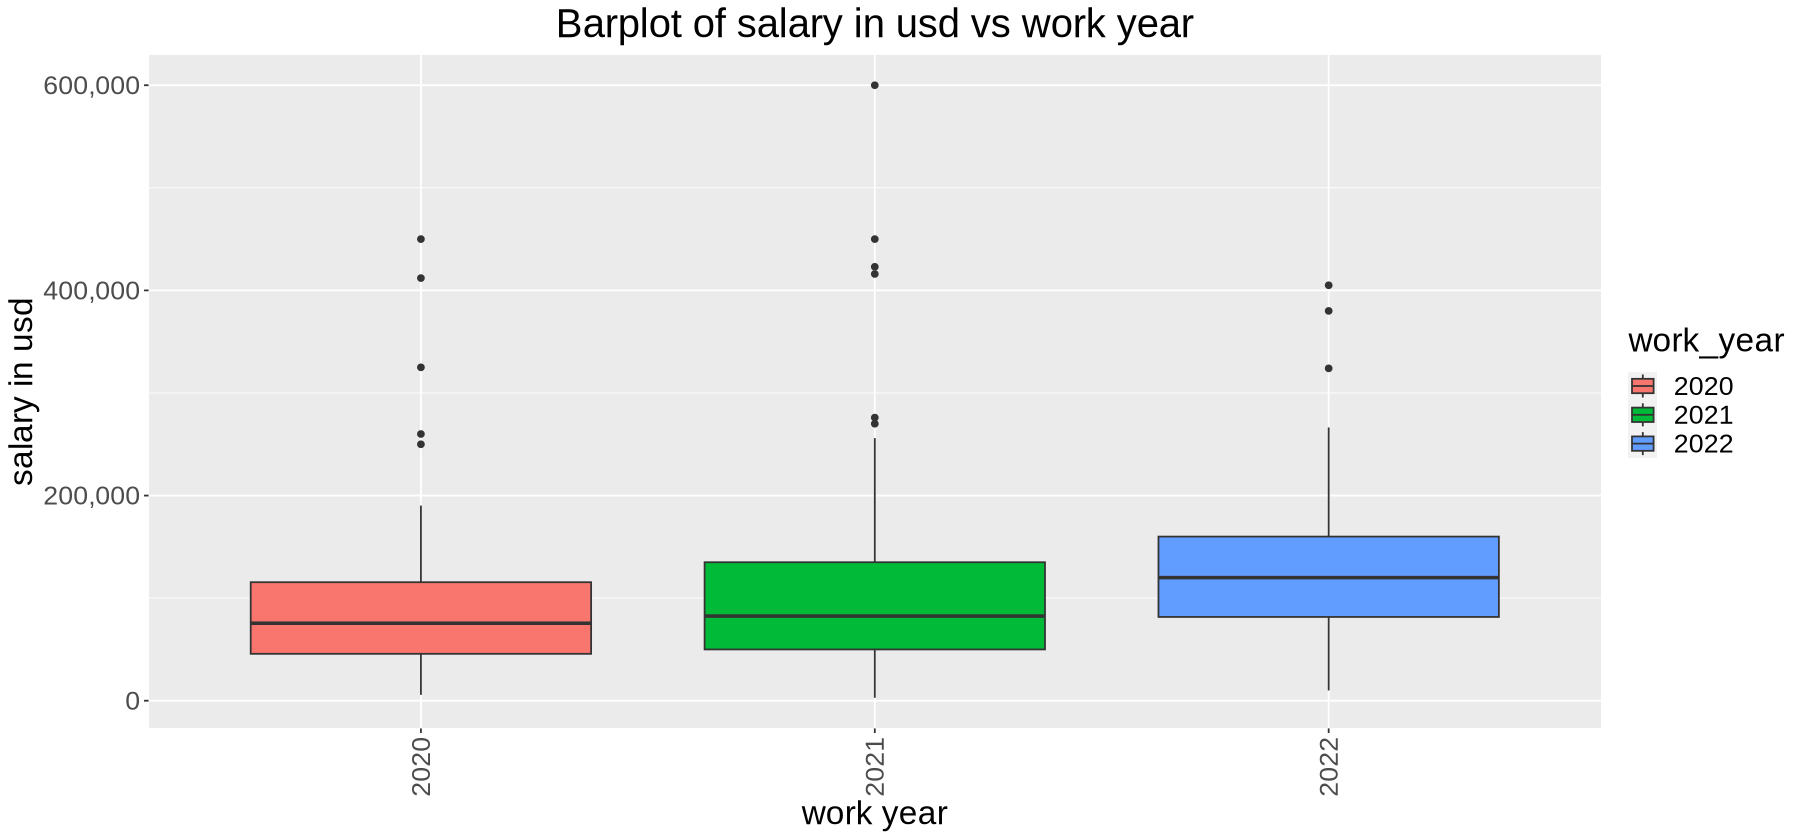

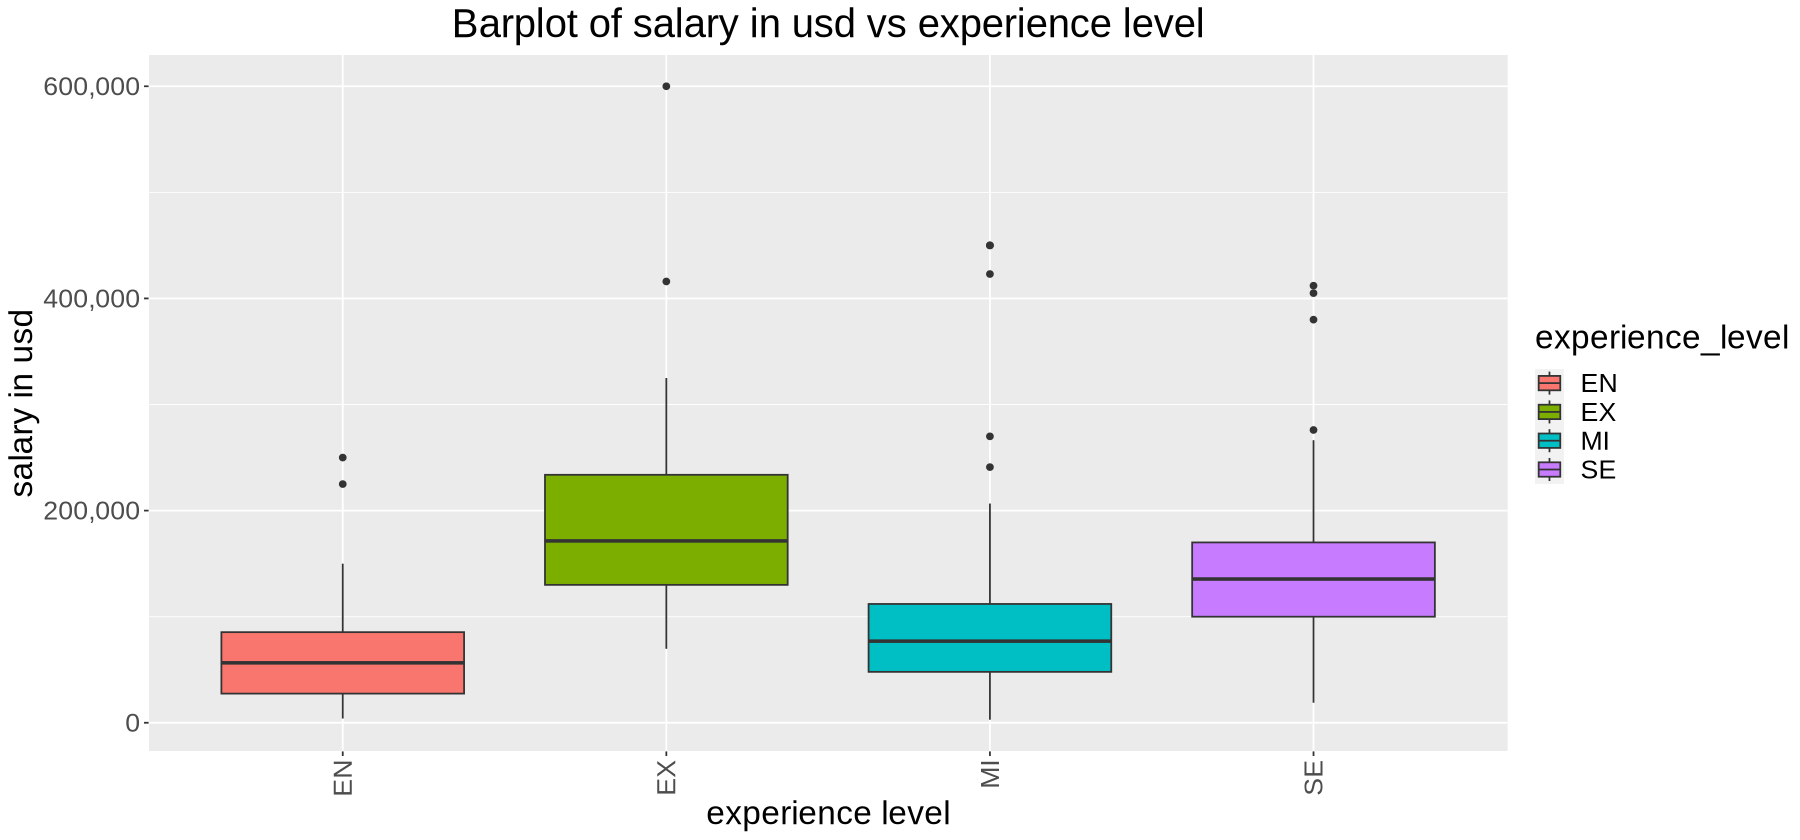

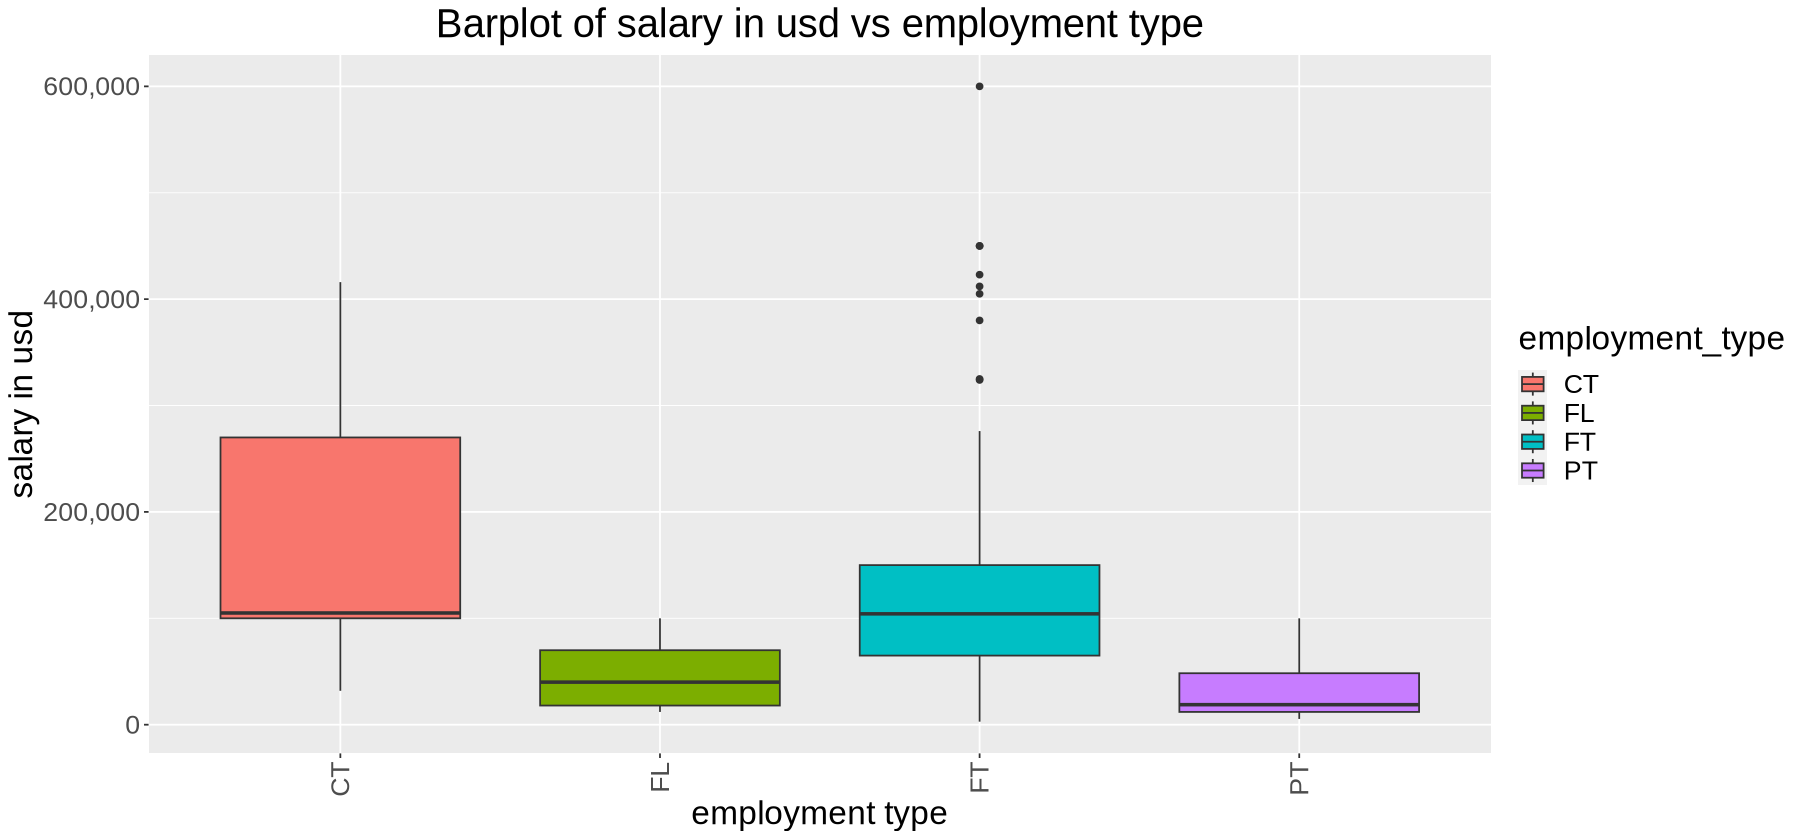

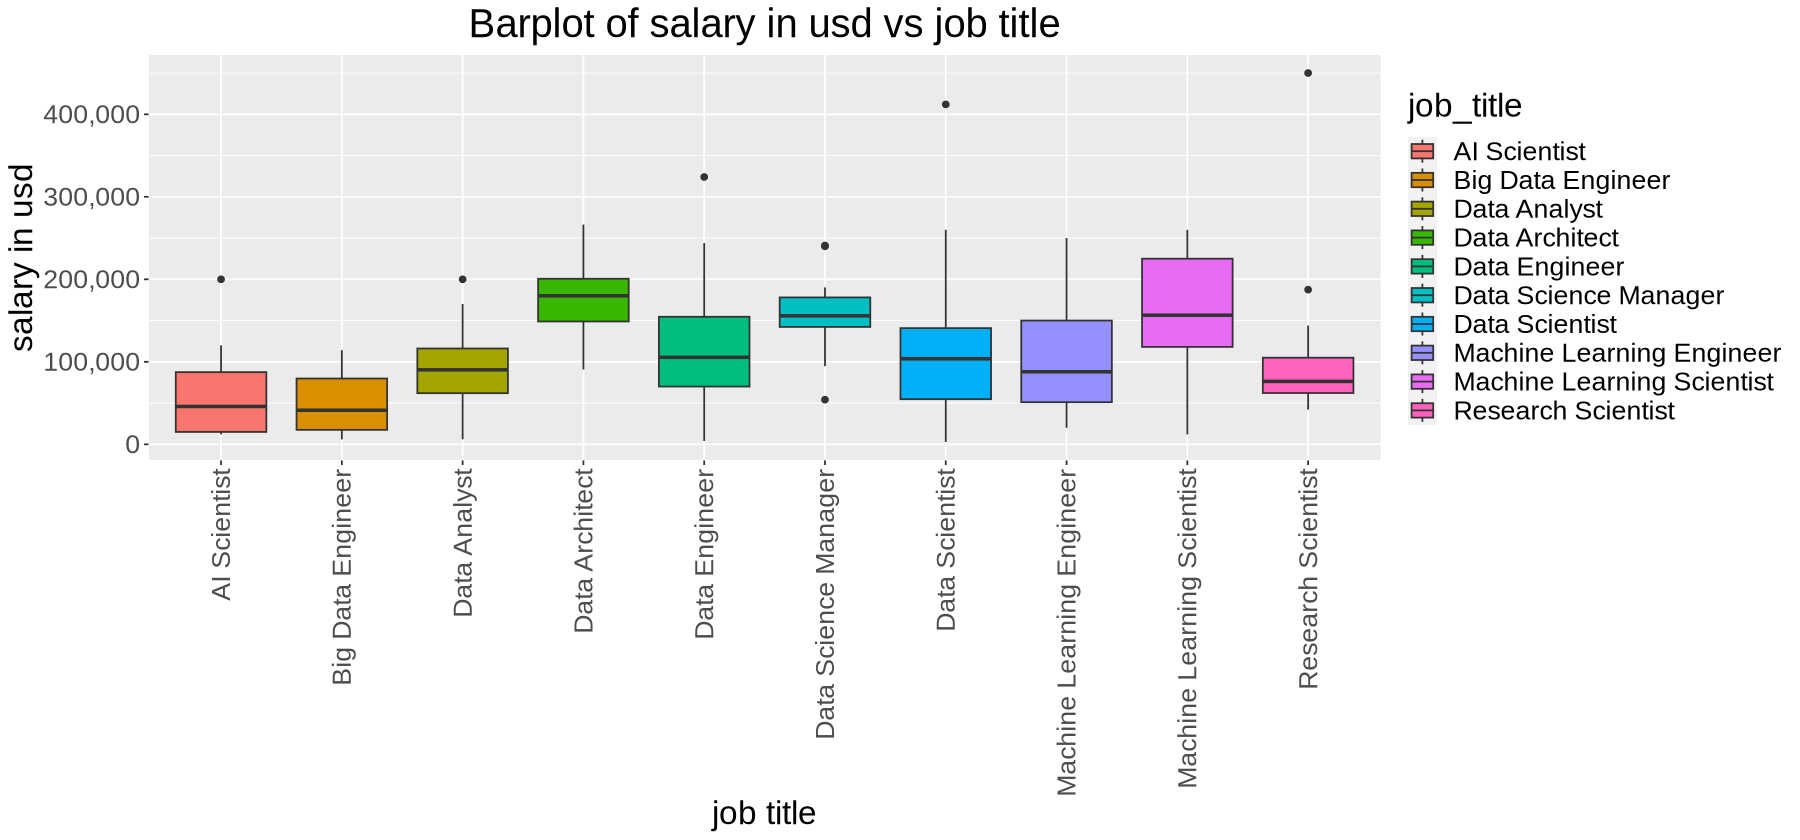

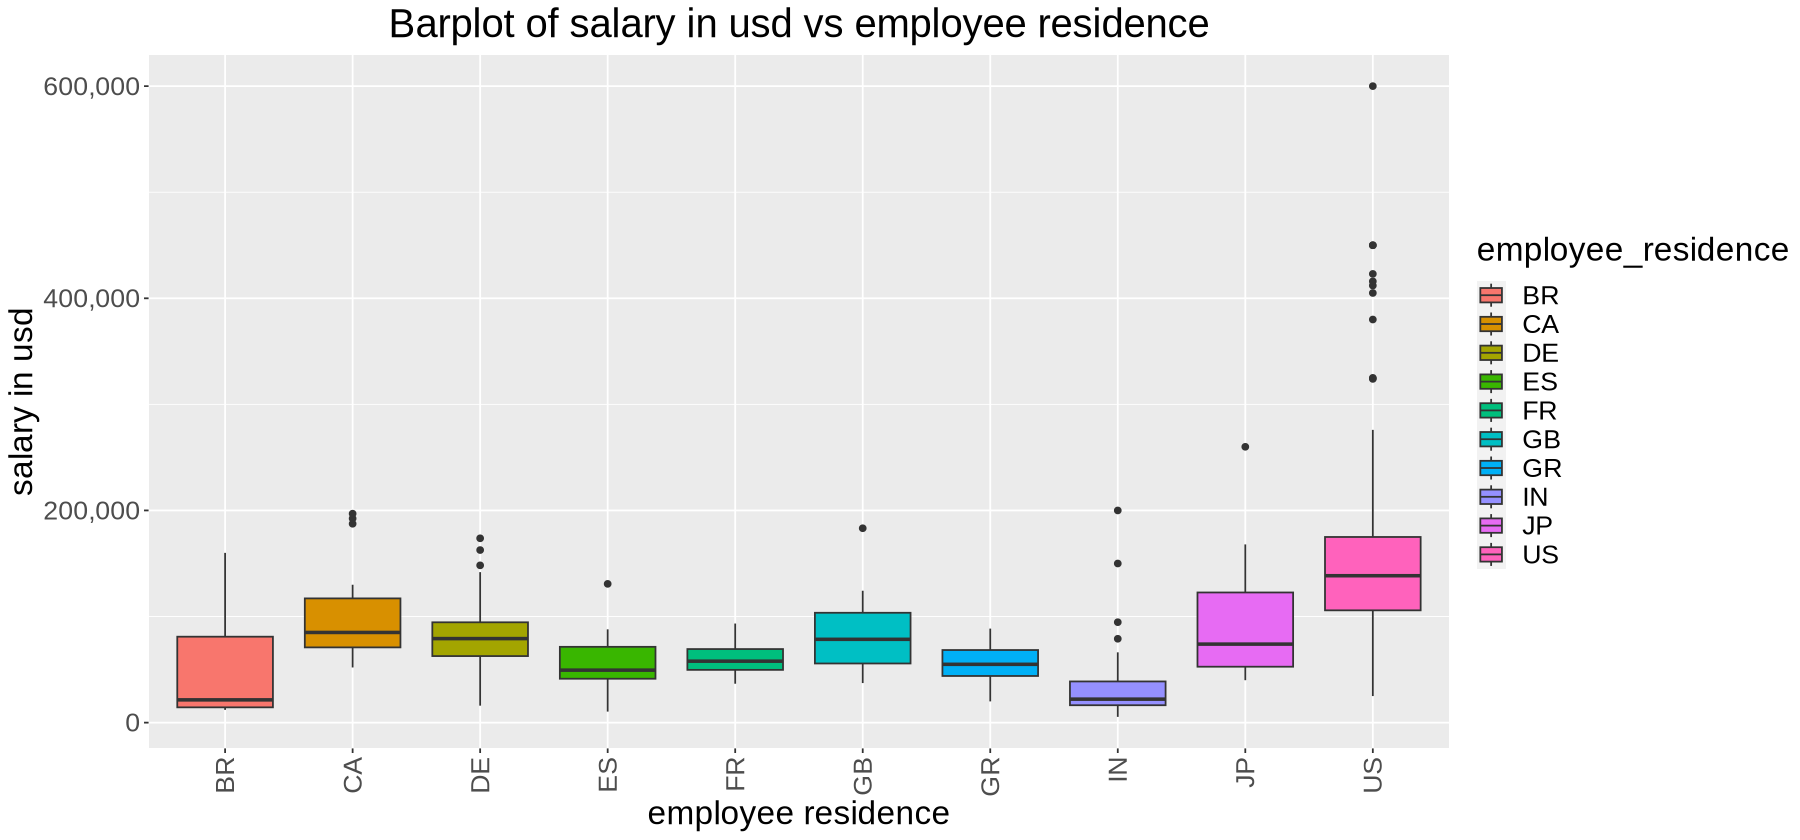

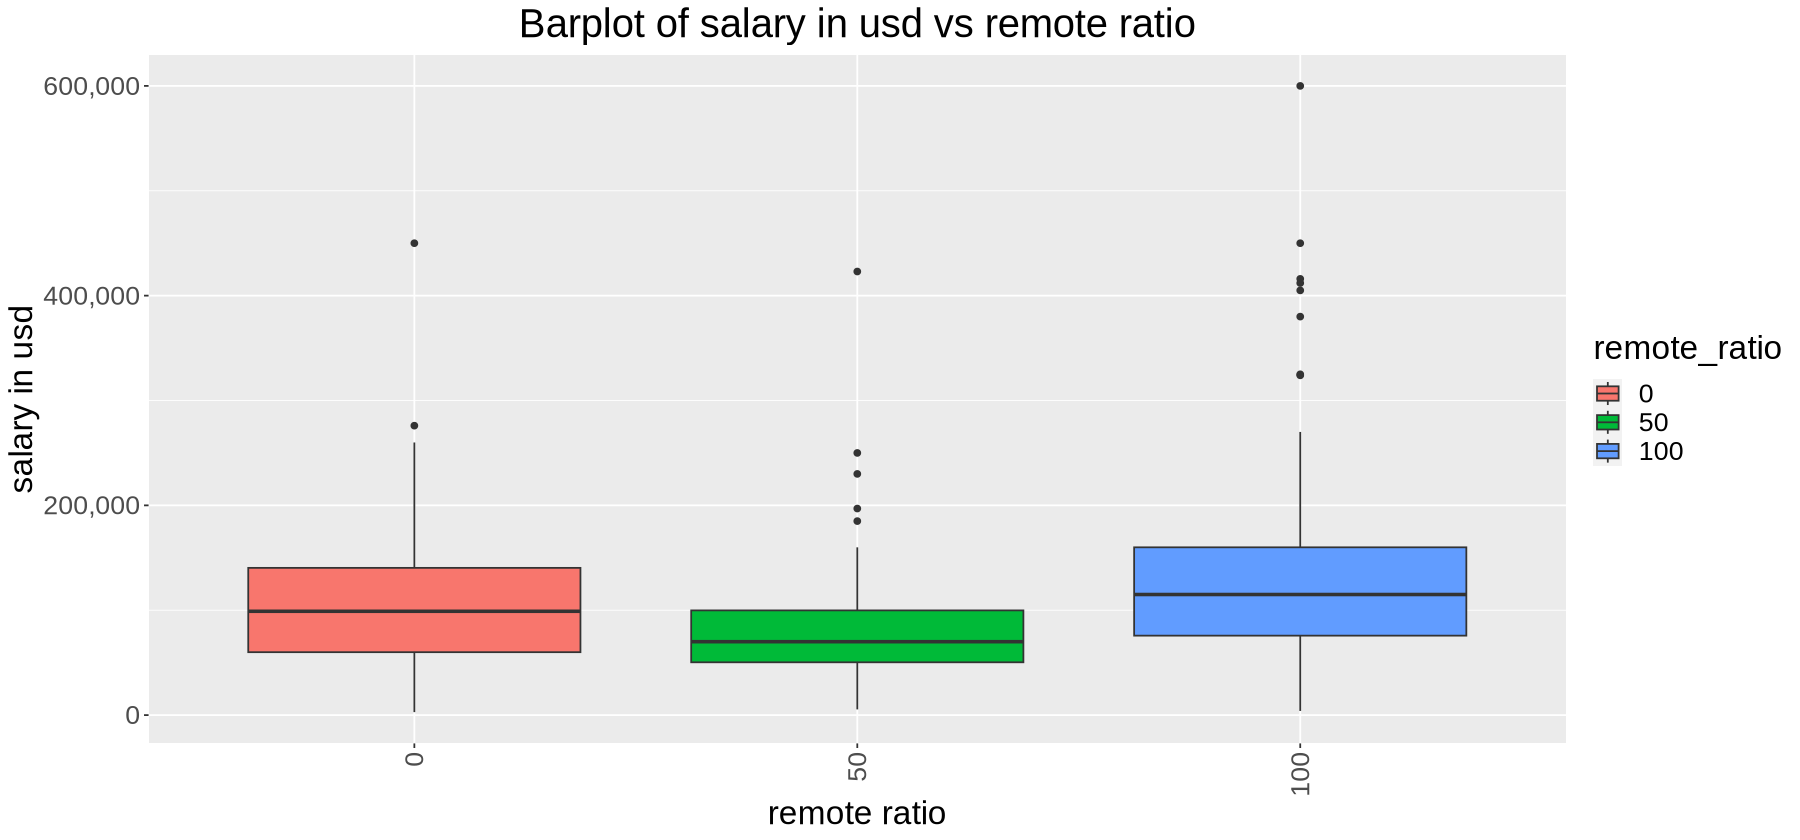

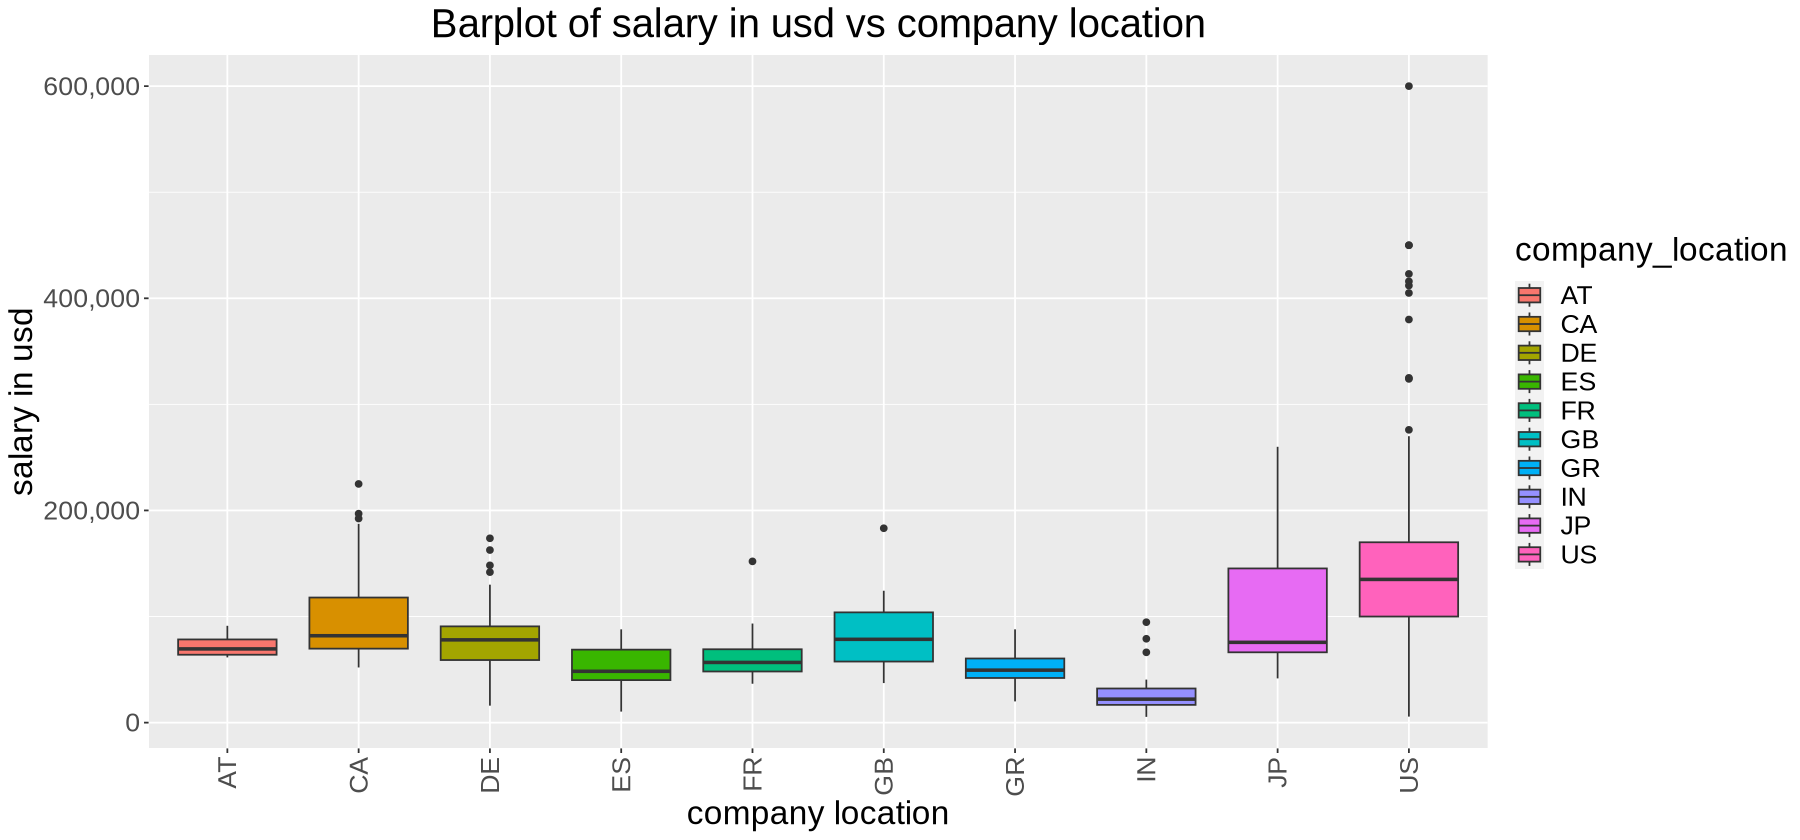

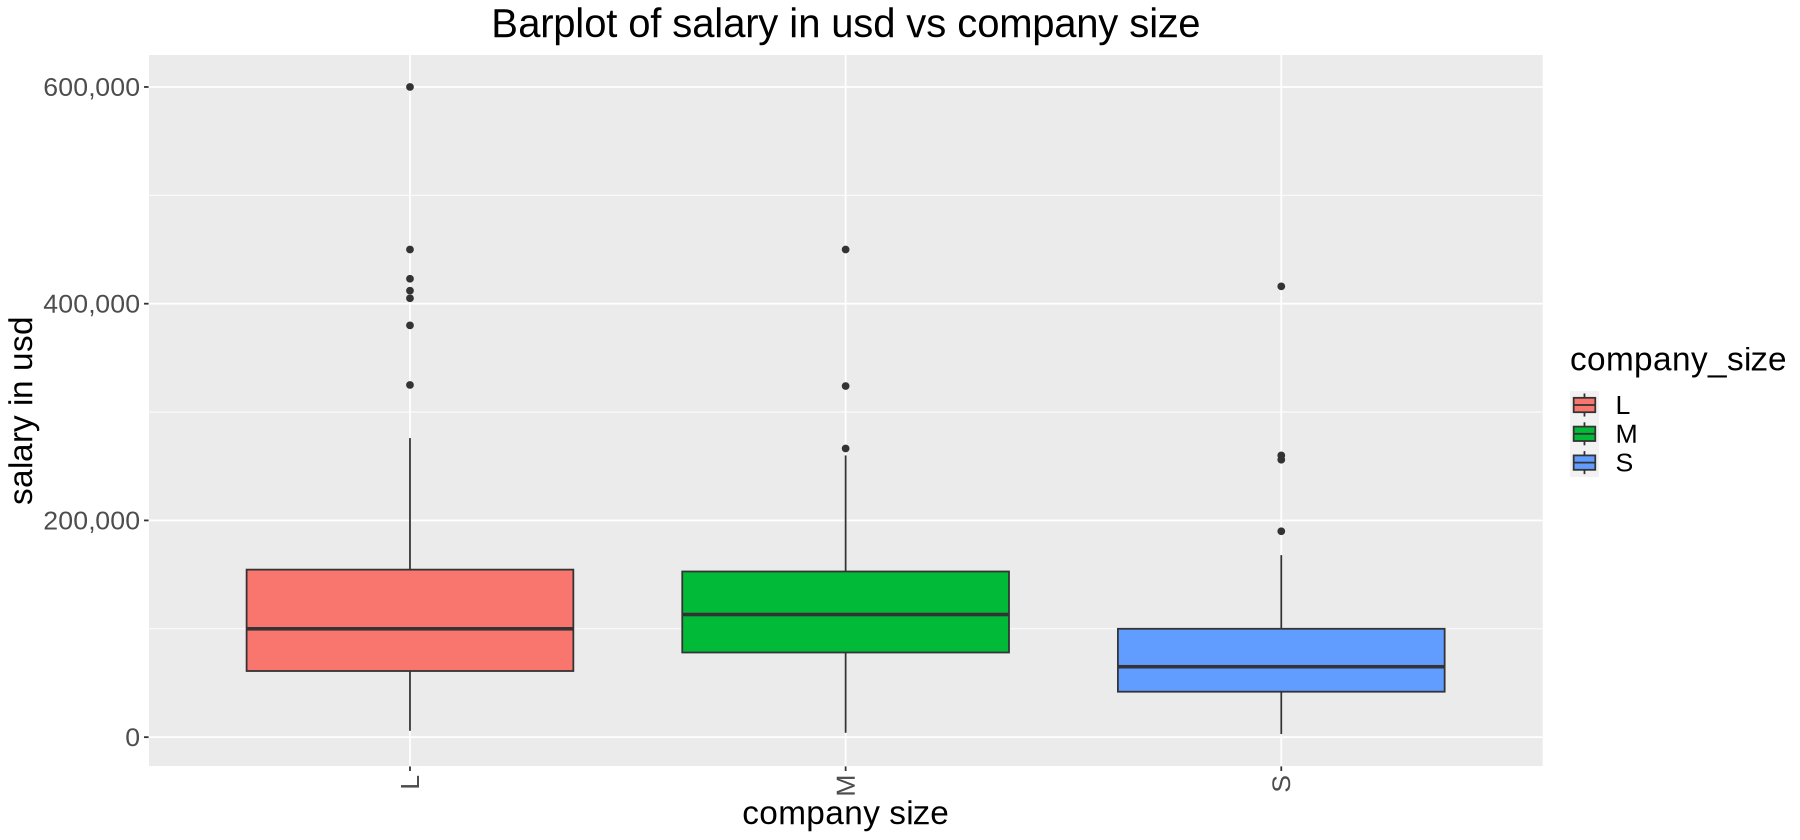

In [72]:
## loop and convert it to a factor
for (var in variables_to_convert) {
  data[[var]] <- as.factor(data[[var]])
}

## loop over each variable and create a barplot
for(var in variables) {
    # skip if the variable is not factor (categorical)
    if(!is.factor(data[[var]])) next
    
    # Get the table of frequencies for the variable
    freq_table <- table(data[[var]])
    top_categories <- names(sort(freq_table, decreasing = TRUE)[1:10])
    filtered_data <- data[data[[var]] %in% top_categories, ]
    
    p <- ggplot(filtered_data , aes_string(x = var,y = target, fill= var)) +
    geom_boxplot() +
    labs(x = gsub("_", " ", var),
         y = gsub("_", " ", target),
         title = paste("Barplot of", gsub("_"," ",target), "vs", gsub("_"," ",var))) +
    theme(plot.title = element_text(hjust = 0.5), 
          axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),
          text = element_text(size=20)) +
    scale_y_continuous(labels = scales::comma)
    print(p)
}